In [4]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

In [5]:
def loadList(fileName):
    with open(fileName, newline = '') as csv_file:
        reader = csv.reader(csv_file)
        dataList = list(reader)
    return dataList

In [6]:
asteroidData = loadList("nasa.csv")

In [7]:
avgDiaSet = []
veloSet = []
avgDisSet = []
dangerSet = []

In [8]:
for n in range(0, len(asteroidData)):
    minDia = float(asteroidData[n][3])
    #print("Minimum Diameter:", minDia)
    
    maxDia = float(asteroidData[n][4])
    #print("Max Diameter:", maxDia)

    avgDia = (maxDia + minDia)/2
    avgDiaSet.append(avgDia) #in KM 
    
    velo = float(asteroidData[n][15]) #in KM per sec.   
    veloSet.append(velo)
    
    perihelionDis = float(asteroidData[n][32]) * 299200000 #converting from AU (astronomical units) to KM 
    
    aphelionDis = float(asteroidData[n][34]) * 299200000
    
    avgDis = (perihelionDis + aphelionDis)/2 
    avgDisSet.append(avgDis)
    
for i in range(0, len(avgDiaSet)):
    dangerSet.append([avgDiaSet[i] * veloSet[i]/1000,avgDisSet[i]])        

for i in range (1, 10):
    print (dangerSet[i])

[9.576420127355942, 331446565.5677658]
[6.360212888042319, 436480085.2908633]
[0.3559532603880576, 375766144.5723822]
[4.531280657874842, 366703929.19620335]
[12.501681591815231, 396000828.2472563]
[12.50167884993563, 396000822.85959935]
[33.960052296862, 370252381.260596]
[46.03451798331345, 342748814.10039705]
[6.219647294290135, 262136709.74550766]


In [9]:
def maxElements(dangerSet, N):
    dangerSet100 = []

    for j in range(len(dangerSet)):
        if len(dangerSet100) < N: 
            if dangerSet[j] not in dangerSet100:
                dangerSet100.append([dangerSet[j][0],dangerSet[j][1]])
        else:
            if dangerSet[j][0] > min(dangerSet100)[0]:
                row = dangerSet100.index(min(dangerSet100))
                dangerSet100[row][0] = dangerSet[j][0]
                dangerSet100[row][1] = dangerSet[j][1]
       
    return(dangerSet100)


In [10]:
maxE100 = maxElements(dangerSet, 100)
print(maxE100)

[[141.99010789881336, 545758547.311519], [138.34776552550125, 248946760.72425497], [101.16076447021216, 375182106.4276401], [95.80287502885906, 184283391.60926798], [103.75707356746291, 439872563.86700857], [140.10211950302892, 235500190.47910297], [88.16059833234632, 633511304.0769581], [94.93406939807704, 464699941.2764222], [129.48629645250688, 652448465.8247962], [87.4631184088694, 388628785.7418995], [87.85306280536118, 225352782.5452877], [93.46115675797247, 354328366.93687296], [202.6383899744859, 552556659.6836152], [86.22054820350802, 704624721.8975989], [105.85730027502619, 649283517.6170722], [94.0815465121983, 792625695.7043178], [96.50803390775931, 434728386.42878616], [107.74358085450042, 264212303.39486143], [110.5189148143478, 266718469.58092818], [122.79953028637664, 548803500.6931608], [223.9410687759444, 273562785.50805944], [103.03706178888271, 354328366.93687296], [143.10002409570606, 283473555.96714985], [93.07102369371768, 727447664.9313402], [355.7761776232774, 

In [11]:
df = pd.DataFrame(maxE100,columns=['Danger','Distance'])
df

,Danger,Distance
0,141.990108,5.457585e+08
1,138.347766,2.489468e+08
2,101.160764,3.751821e+08
3,95.802875,1.842834e+08
4,103.757074,4.398726e+08
...,...,...
95,144.945318,7.378359e+08
96,91.674666,5.262784e+08
97,104.444793,5.047672e+08
98,223.888713,7.378891e+08


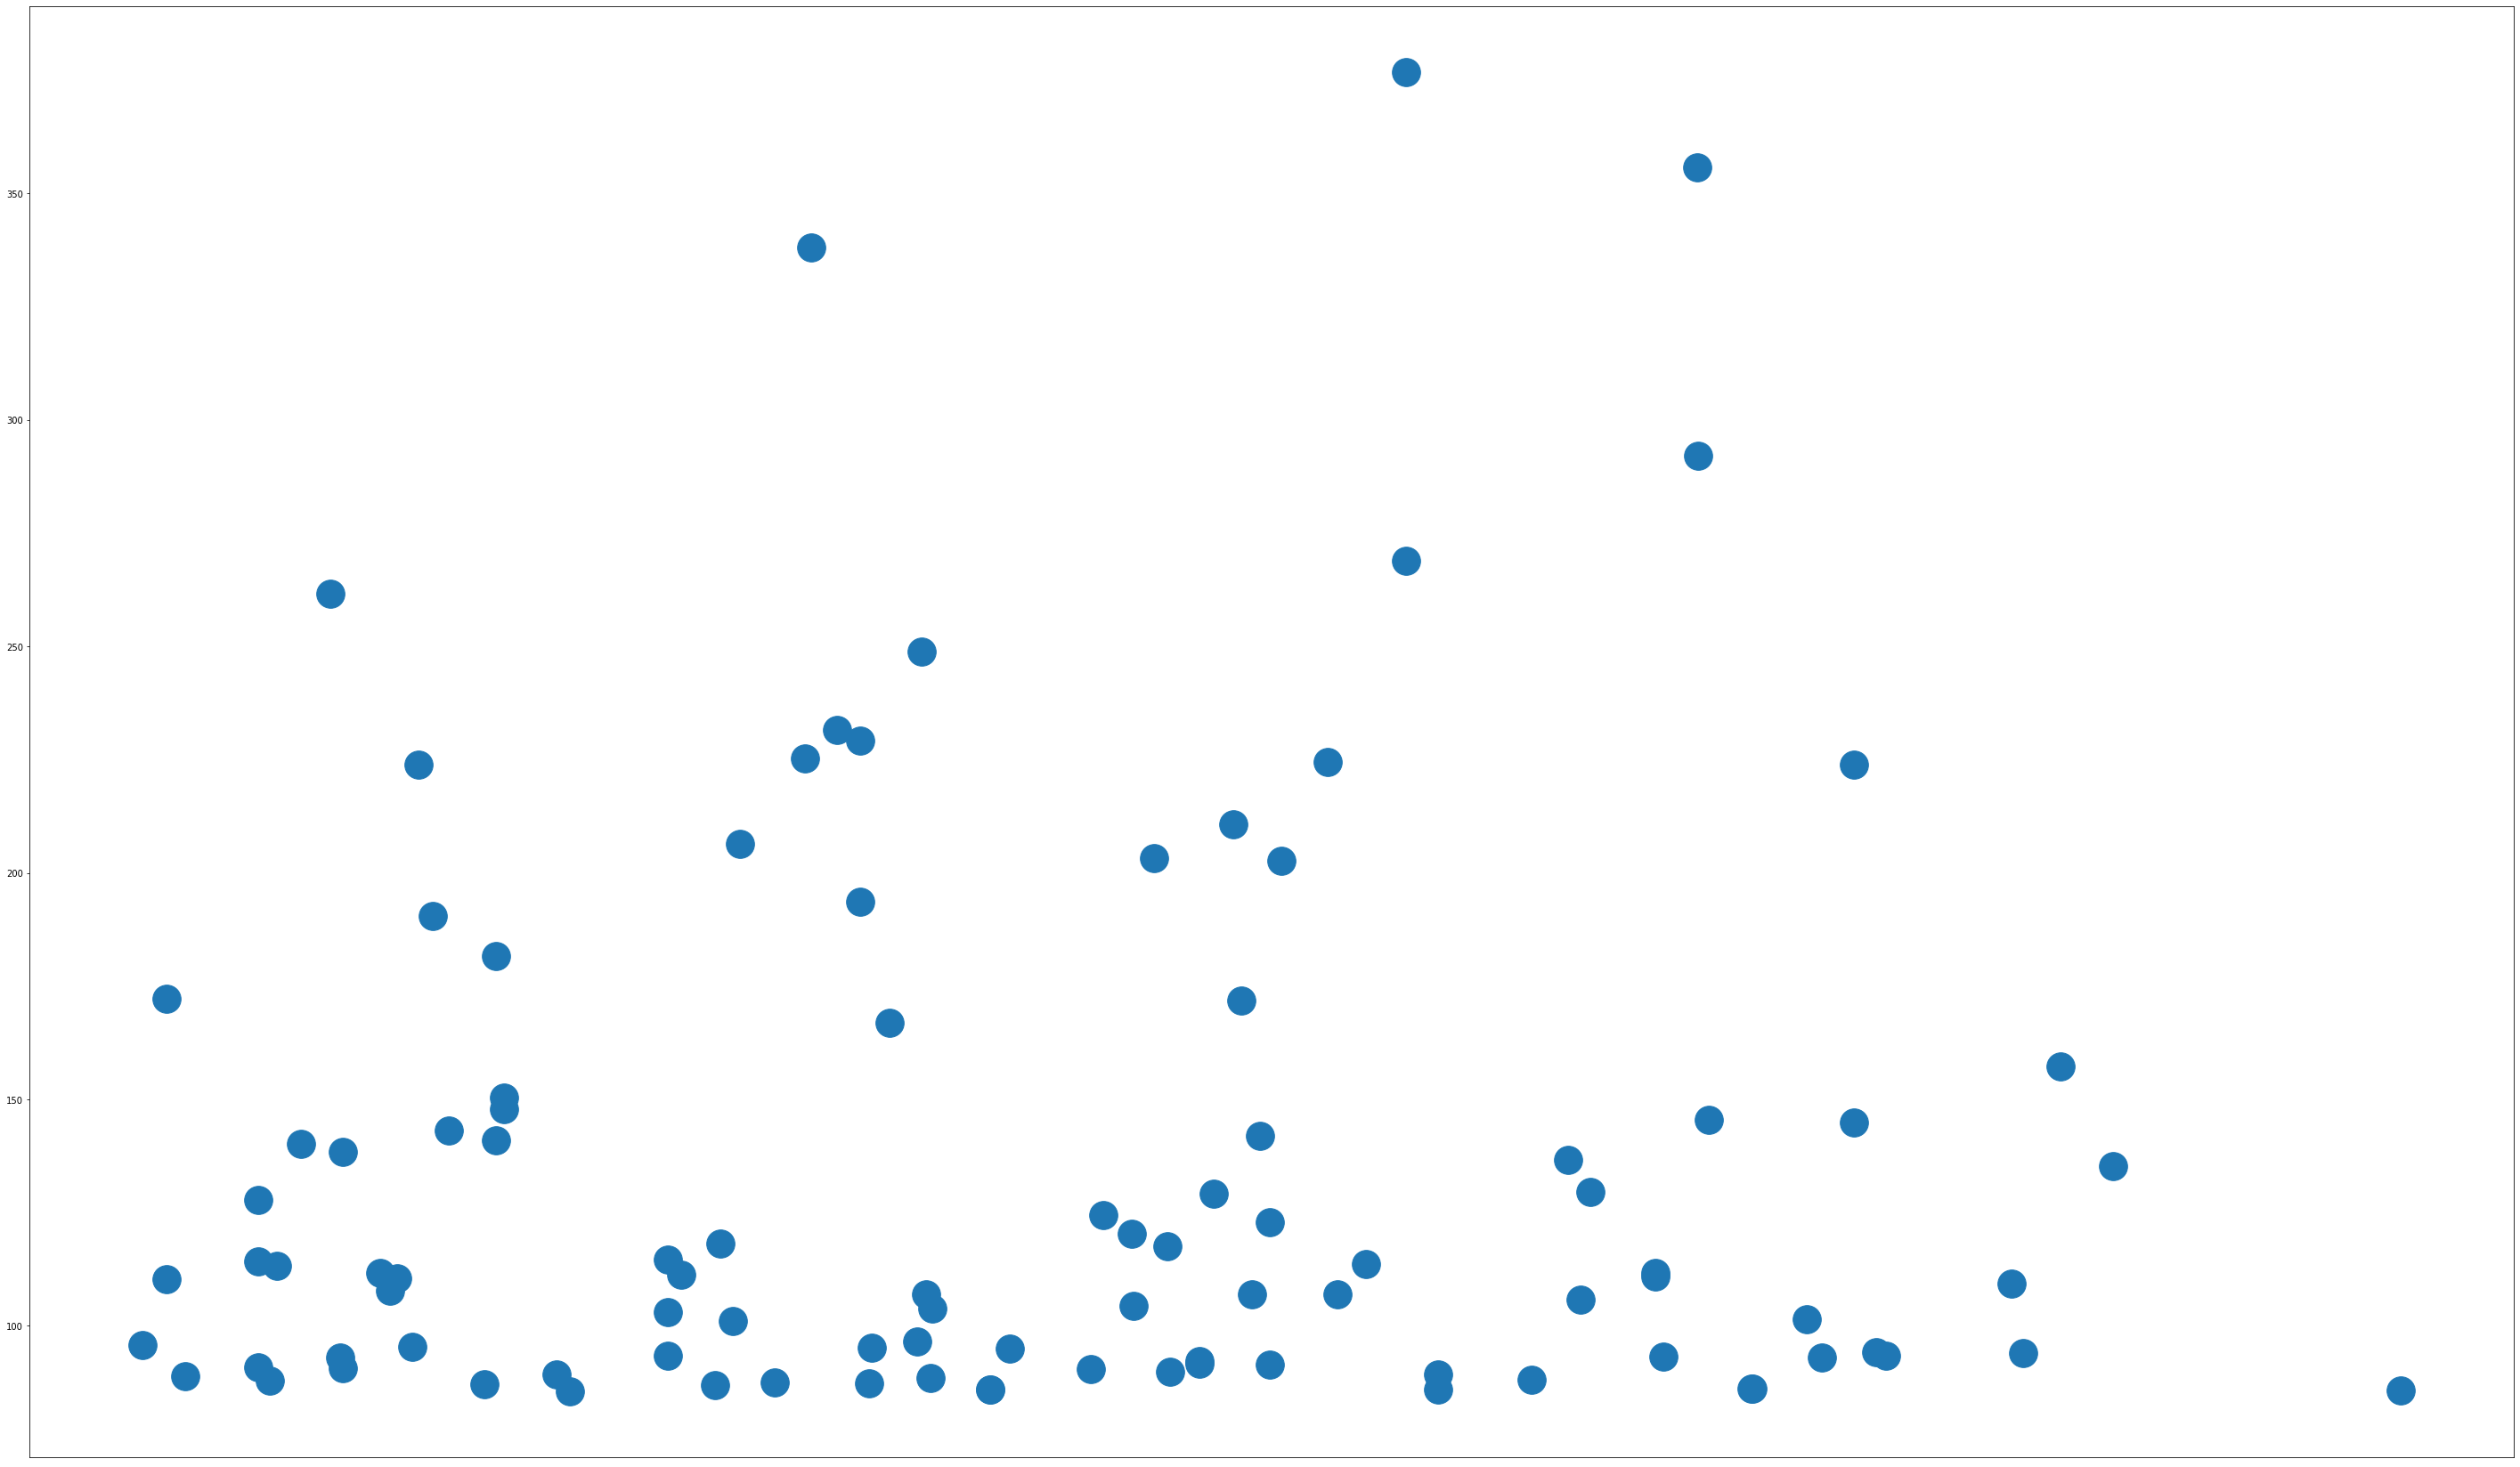

In [12]:
x = df.Distance
y = df.Danger

plt.figure(figsize = (50,30))
plt.grid
plt.xticks([1,2,3,4,5,6,7,8,9,10])

plt.scatter(x,y, s = 1000)
plt.show()